In [2]:
%pylab inline
import pylab
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


C:\Users\skme2\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

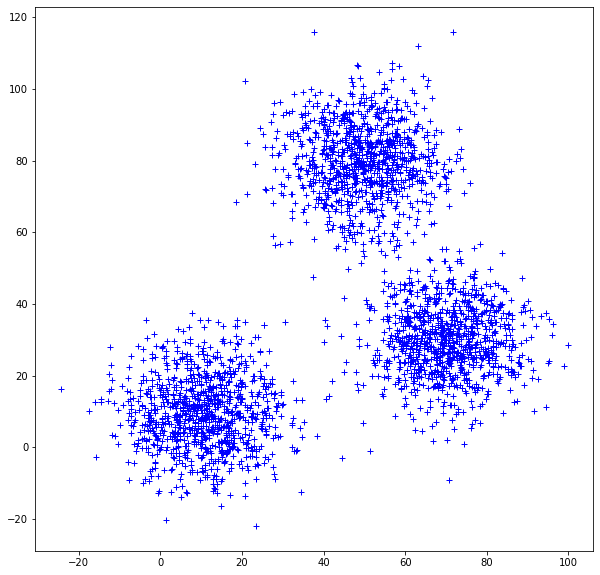

In [4]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

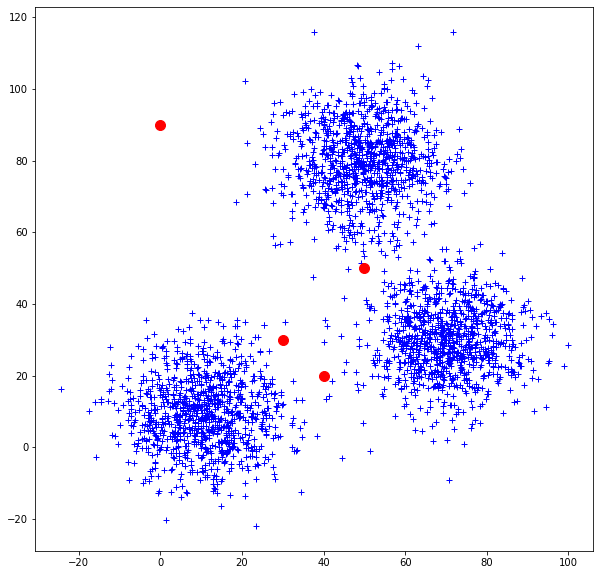

In [5]:
protos = array([[30,30],[40,20],[0,90],[50,50]])
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

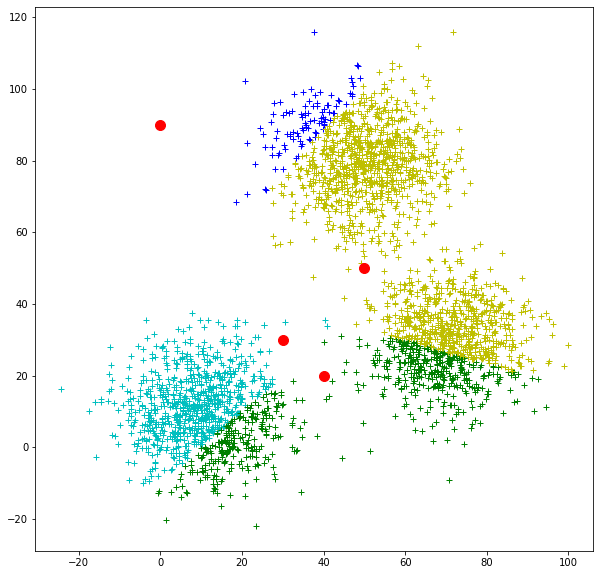

In [6]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [7]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

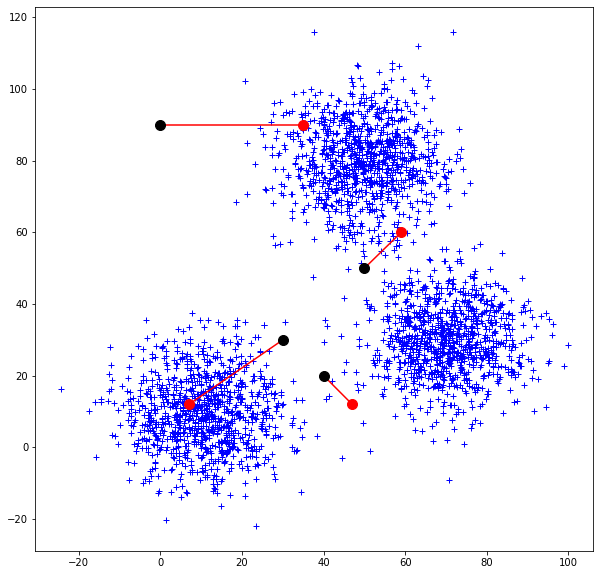

In [8]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [9]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

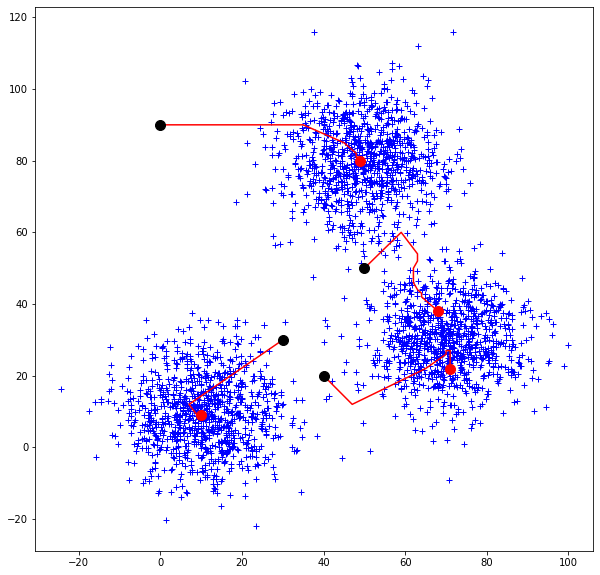

In [10]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

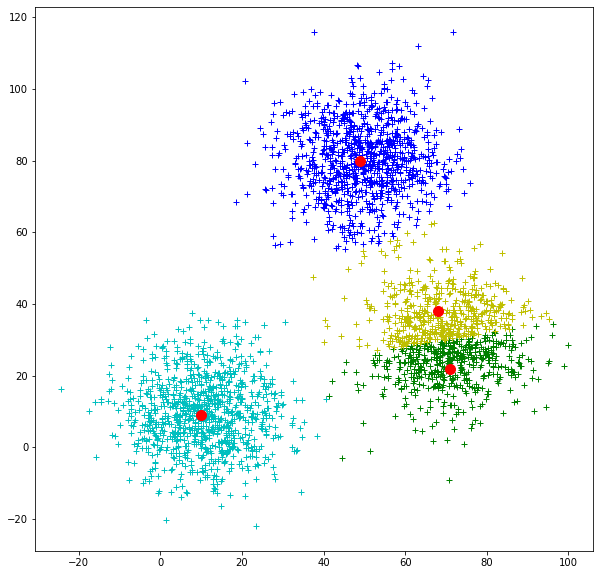

In [11]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [13]:
dataset=pd.read_csv(r'C:\Users\skme2\OneDrive\Documents\Python Scripts\MACHINE LEARNING PRACTICE\Machine Learning Module 4-20220108T121725Z-001\Machine Learning Module 4\clustering-20210302T225507Z-001\clustering\Mall_Customers.csv')

In [14]:
X=dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Users\skme2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


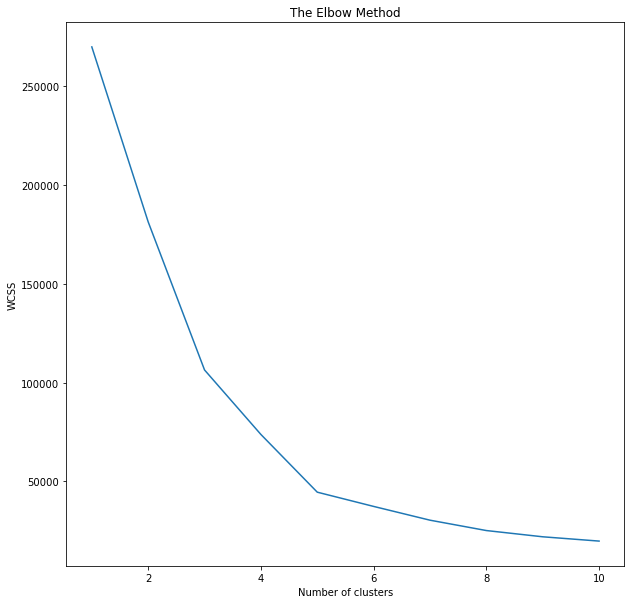

In [15]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [17]:
test=kmeans.predict(np.asarray([[3,3]]))
test[0]

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2

In [18]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [19]:
X[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


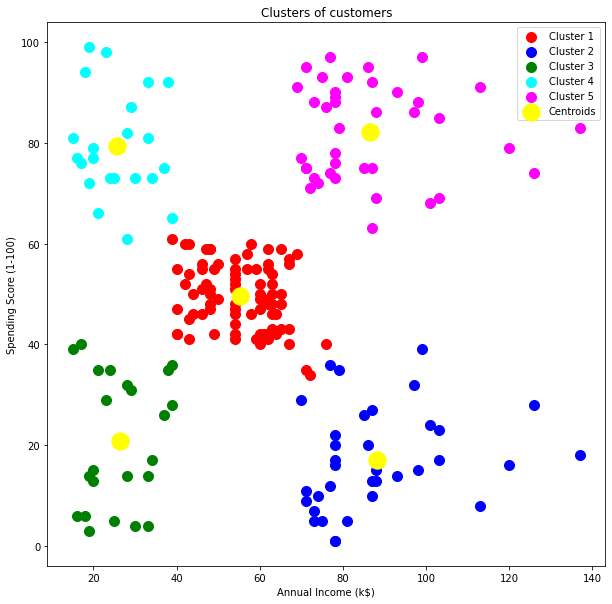

In [20]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [22]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [23]:
import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [24]:
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

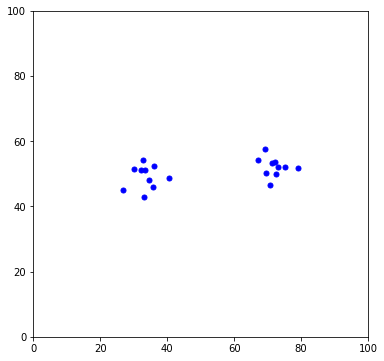

In [25]:

data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]

plotclusters(data)

In [26]:
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [27]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm[:5]

<ipython-input-27-d38431098767>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,"single")


array([[ 0.        ,  1.        ,  3.47895938,  2.        ],
       [13.        , 17.        ,  4.70353805,  2.        ],
       [ 2.        , 20.        ,  4.79082945,  3.        ],
       [ 6.        , 22.        ,  5.0975392 ,  4.        ],
       [10.        , 16.        ,  6.90549253,  2.        ]])

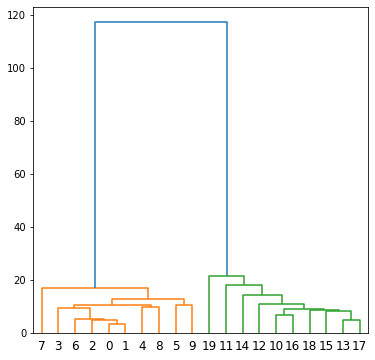

In [28]:
_=dendrogram(lm)

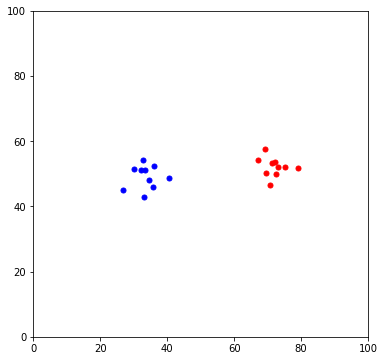

In [29]:
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

In [30]:
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

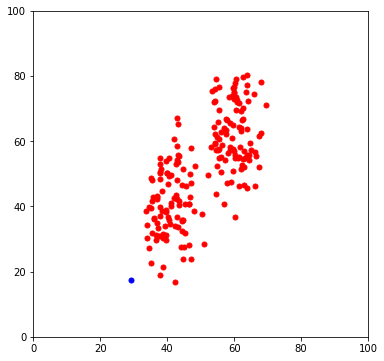

In [31]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

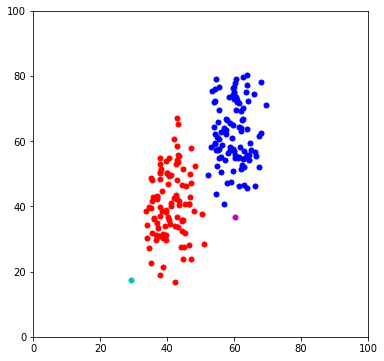

In [32]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

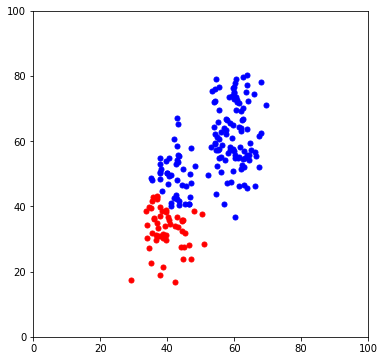

In [33]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

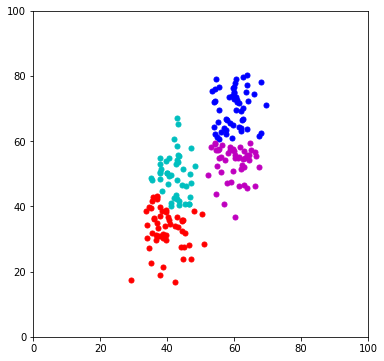

In [34]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

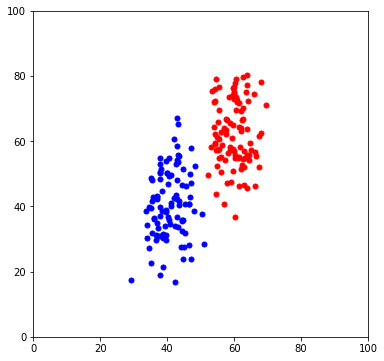

In [35]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

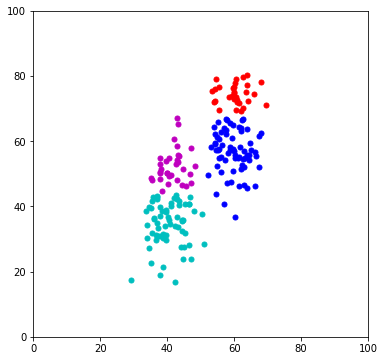

In [36]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

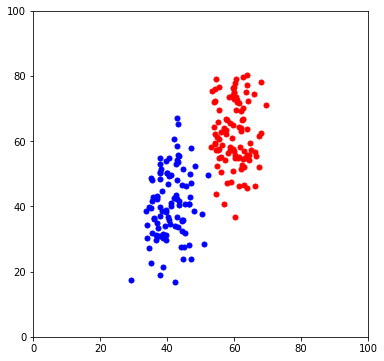

In [37]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

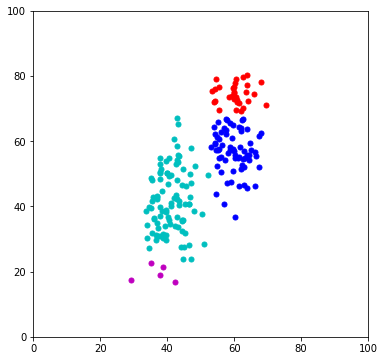

In [38]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

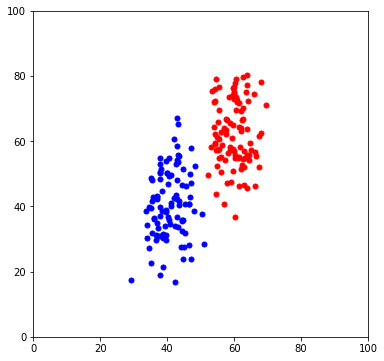

In [39]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

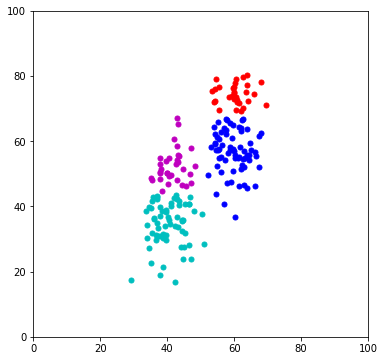

In [40]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

In [41]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [42]:
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  

X = StandardScaler().fit_transform(X)

In [43]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  
core_samples_mask[db.core_sample_indices_] = True 
labels = db.labels_  

In [44]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1) 

In [45]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


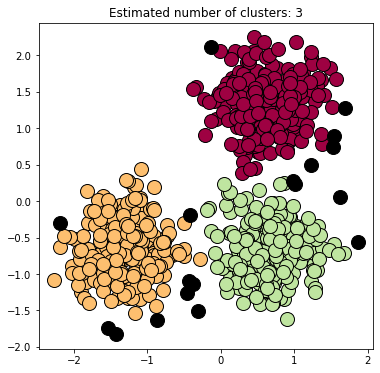

In [46]:
import matplotlib.pyplot as plt
unique_labels = set(labels) 
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k) 
    

    xy = X[class_member_mask & core_samples_mask] 
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [47]:
print("Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))

Rand Index: 0.952


In [51]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(labels_true, labels)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\skme2\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [52]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [53]:
purity_score(labels_true, labels)

0.9813333333333333

In [54]:
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [55]:
#PCA

In [56]:
import numpy as np
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape 

print("Array:")
print(A) 

print("---")
print("Dimensions:")
print(A.shape) 

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[0. 0.]


In [57]:
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


In [58]:
df.values

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [60]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

<ipython-input-61-106ca87ff424>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Dataset $A$')

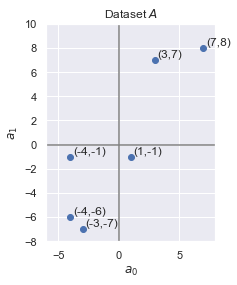

In [61]:

plt.scatter(A[:,0],A[:,1])  


for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Dataset $A$")

In [63]:

a0 = A[:,0]
a1 = A[:,1]
product = a0*a1
print("Length of prod equals" + str(len(product)))
print("---")
print("Covariance:")
print(np.sum(prod)/(m-1))

Length of prod equals6
---
Covariance:


TypeError: unsupported operand type(s) for /: 'function' and 'int'

In [64]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [65]:
A.T 

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [66]:
A.T @ A

array([[100, 125],
       [125, 200]])

In [67]:
Sigma = (A.T @ A)/(m-1)
Sigma

array([[20., 25.],
       [25., 40.]])

In [68]:

l, X = np.linalg.eig(Sigma)
print("Eigenvalues:")
print(l)
print("---")
print("Eigenvectors:")
print(X)

Eigenvalues:
[ 3.07417596 56.92582404]
---
Eigenvectors:
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [69]:
print("Sigma times eigenvector:")
print(Sigma @ X[:,0]) 
print("Eigenvalue times eigenvector:")
print(l[0] * X[:,0]) 

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [70]:

print("Sigma times eigenvector:")
print(Sigma @ X[:,1]) 
print("Eigenvalue times eigenvector:")
print(l[1] * X[:,1])

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [71]:
print("The first principal component is eigenvector with largest evalue:")
print(X[:,1])
print("---")
print("Second principal component:")
print(X[:,0])

The first principal component is eigenvector with largest evalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [72]:
X[:,1].T @ X[:,0]

0.0

<ipython-input-73-06b6fefbf7e5>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Eigenvectors of $\\Sigma$')

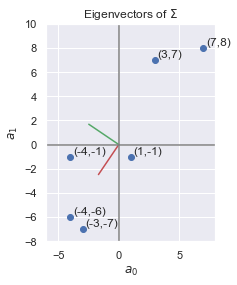

In [73]:
plt.scatter(A[:,0],A[:,1])
scale = 3 
plt.plot([0,X[0,1]*scale],[0,X[1,1]*scale],'r')
plt.plot([0,X[0,0]*scale],[0,X[1,0]*scale],'g') 


for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))


plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

In [74]:
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)
Amat

matrix([[ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [75]:
pc1 = Xmat[:,1]
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [76]:
Acomp = Amat @ pc1 
print("Compressed version of A:")
print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [77]:
Arec = Acomp @ pc1.T
print("Reconstruction from 1D compression of A:")
print(Arec)

Reconstruction from 1D compression of A:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


<ipython-input-78-6e6d37c41776>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Reconstructing the 1D compression of $A$')

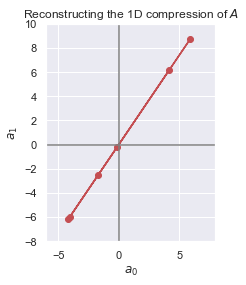

In [78]:
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') 

plt.plot([-6,8],[0,0],'grey') 
plt.plot([0,0],[-8,10],'grey')
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Reconstructing the 1D compression of $A$")

In [79]:
print(np.linalg.matrix_rank(Amat)) 
print(np.linalg.matrix_rank(Arec))

2
1


In [80]:
Amat @ Xmat[:,1] @ Xmat[:,1].T + Amat @ Xmat[:,0] @ Xmat[:,0].T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

In [81]:
A @ Xmat @ Xmat.T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

<ipython-input-82-0fa5b0e543da>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Back to $A$')

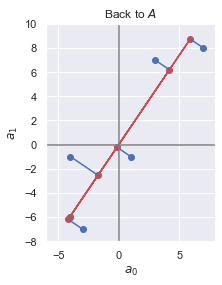

In [82]:
plt.scatter(A[:,0], A[:,1]) # A in blue
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED


for i in range(m):
    e = np.vstack((A[i],Arec[i]))
    plt.plot(e[:,0],e[:,1],'b') # BLUE


plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Back to $A$")

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
data = pd.read_csv(r'C:\Users\skme2\OneDrive\Documents\Python Scripts\MACHINE LEARNING PRACTICE\Machine Learning Module 4-20220108T121725Z-001\Machine Learning Module 4\PCA\PCA\glass.data')

In [85]:
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [86]:
data.isna().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [87]:
data=data.drop(labels=['index','Class'], axis=1)

In [88]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)


In [90]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [91]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


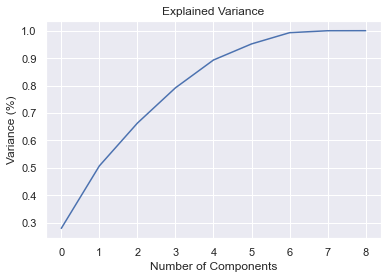

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [93]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)

principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [94]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


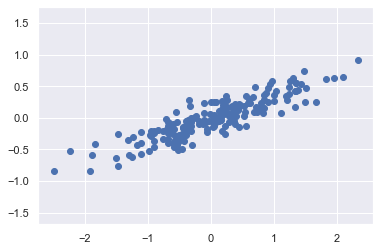

In [95]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


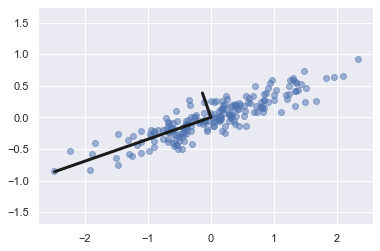

In [97]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [98]:
clf = PCA(0.95) 
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


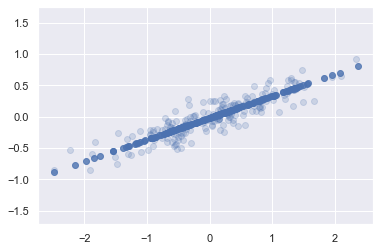

In [99]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

In [101]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(2)  
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


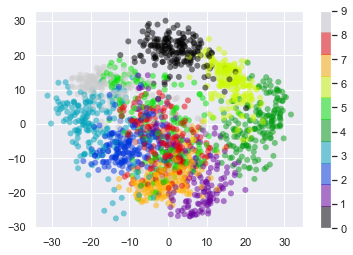

In [102]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

In [1]:
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

ModuleNotFoundError: No module named 'fig_code'

In [104]:
pip install fig_code

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement fig_code
ERROR: No matching distribution found for fig_code


In [2]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

ModuleNotFoundError: No module named 'fig_code'

In [5]:
import seaborn as sns
from sklearn.decomposition import PCA
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

NameError: name 'X' is not defined

In [6]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

NameError: name 'plt' is not defined

In [7]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=range(1, 64), nside=range(1, 8))

C:\Users\skme2\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


interactive(children=(Dropdown(description='n_components', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

<function __main__.plot_digits(n_components)>